# Imports and Helper Functions

In [443]:
# importing necessary libraries
import pandas as pd
import numpy as np
import math
from decimal import Decimal
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [189]:
def draw_heatmap(errors, D_list, title):
    '''
    Function takes in list of errors, list of tree depths, and title, and displays a heatmap
    '''
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

# Dataset 1: Fertility

### Experiment 1 Setup

In [474]:
# read in dataset, assign column names
fertility_raw = pd.read_csv('data/fertility.csv')
fertility_raw.columns = ['Season', 'Age', 'Child Diseases', 'Trauma', 'Surgery', 'Fevers in Past Year', 'Alcohol Consumption', 
                         'Smoking Habit', 'Sedentary Hours Daily', 'Diagnosis']

fertility_df = fertility_raw
fertility_df

,Season,Age,Child Diseases,Trauma,Surgery,Fevers in Past Year,Alcohol Consumption,Smoking Habit,Sedentary Hours Daily,Diagnosis
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
...,...,...,...,...,...,...,...,...,...,...
94,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
95,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
96,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
97,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


In [475]:
# split x and y data
fertility_X = fertility_df[fertility_raw.columns[0:9]]
fertility_y = fertility_df['Diagnosis']

In [476]:
# initialize lists to collect evaluation metric
algorithm = []
split = []
training_accuracy_lst = []
testing_accuracy_lst = []
validation_accuracy_lst = []
hyperparameter_lst  = []

### Models

#### Classifier 1: Logisitc Regression

In [477]:
lr = LogisticRegression(max_iter=1000)
penalty = [None, 'l1', 'l2']
solver = ['lbfgs', 'liblinear']
param_grid = {'penalty': penalty, 'solver': solver}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Logistic Regression')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(fertility_X, fertility_y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    #draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    hp = grid_search.best_params_
    hyperparameter_lst.append(hp)
    print('Hyperparameters: {}'.format(hp)) 

    # new estimator with hyperparameters, train model
    lr_hp = LogisticRegression(penalty=hp['penalty'], solver=hp['solver'], max_iter=1000)
    lr_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = lr_hp.predict(X_train)
    Y_test_pred = lr_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

Test: 0.8
Hyperparameters: {'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy: 0.7894736842105263
Testing Accuracy: 0.8875
Validation Accuracy: 0.7857142857142857
Test: 0.5
Hyperparameters: {'penalty': 'l2', 'solver': 'liblinear'}
Training Accuracy: 0.8367346938775511
Testing Accuracy: 0.92
Validation Accuracy: 0.8370098039215685
Test: 0.2
Hyperparameters: {'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy: 0.8734177215189873
Testing Accuracy: 0.9
Validation Accuracy: 0.8736942070275404


/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/pallavigaikwad/anaconda3

#### Classifier 2: K-Nearest Neighbors

Test: 0.8


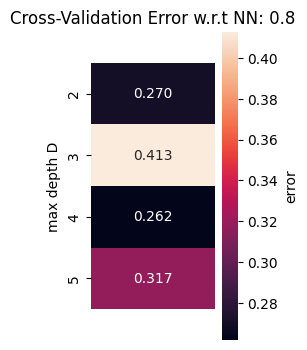

Best N_Neighbors: 4
Training Accuracy: 0.8421052631578947
Testing Accuracy: 0.825
Validation Accuracy: 0.7380952380952381
Test: 0.5


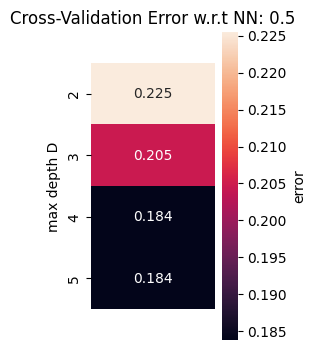

Best N_Neighbors: 4
Training Accuracy: 0.8163265306122449
Testing Accuracy: 0.9
Validation Accuracy: 0.8161764705882352
Test: 0.2


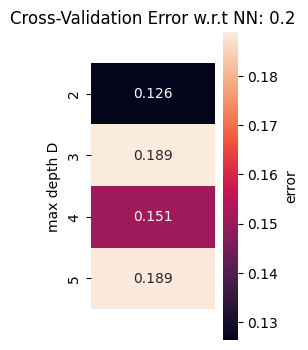

Best N_Neighbors: 2
Training Accuracy: 0.8987341772151899
Testing Accuracy: 0.95
Validation Accuracy: 0.8736942070275404


In [556]:
knn = KNeighborsClassifier()
n_neighbors = [2, 3, 4, 5]
param_grid = {'n_neighbors': n_neighbors}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('K-Nearest Neighbors')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(fertility_X, fertility_y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    nn = grid_search.best_params_['n_neighbors']
    hyperparameter_lst.append(grid_search.best_params_)
    print('Best N_Neighbors: {}'.format(nn)) 

    # new estimator with hyperparameters, train model
    knn_hp = KNeighborsClassifier(n_neighbors=nn)
    knn_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = knn_hp.predict(X_train)
    Y_test_pred = knn_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

#### Classifier 3: SVM

In [479]:
svm = SVC()
C = [0.001, 0.01, 0.1, 1, 10]
gamma = [0.001, 0.01, 0.1, 1, 10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {'kernel': kernel, 'C': C , 'gamma': gamma}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Support Vector Machine')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(fertility_X, fertility_y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    #draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    hp = grid_search.best_params_
    hyperparameter_lst.append(hp)
    print('Hyperparameters: {}'.format(hp)) 

    # new estimator with hyperparameters, train model
    svm_hp = SVC(kernel=hp['kernel'], C=hp['C'], gamma=hp['gamma'])
    svm_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = svm_hp.predict(X_train)
    Y_test_pred = svm_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)
    
    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

Test: 0.8
Hyperparameters: {'C': 10, 'gamma': 10, 'kernel': 'sigmoid'}
Training Accuracy: 0.6842105263157895
Testing Accuracy: 0.85
Validation Accuracy: 0.8412698412698413
Test: 0.5
Hyperparameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Training Accuracy: 0.8163265306122449
Testing Accuracy: 0.94
Validation Accuracy: 0.8357843137254902
Test: 0.2
Hyperparameters: {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
Training Accuracy: 0.8734177215189873
Testing Accuracy: 0.9
Validation Accuracy: 0.8736942070275404


#### Classifier 4: Decision Tree

Test: 0.8


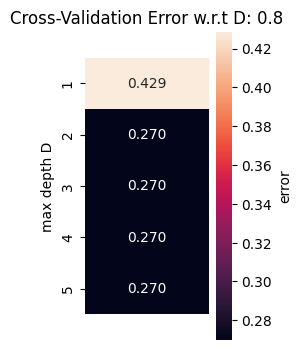

Best Max Depth: 2
Training Accuracy: 0.8947368421052632
Testing Accuracy: 0.725
Validation Accuracy: 0.7301587301587301
Test: 0.5


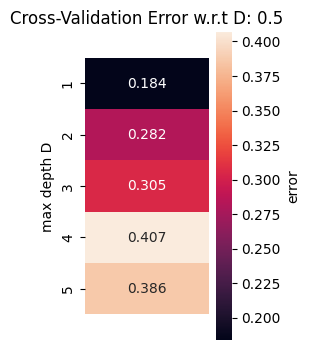

Best Max Depth: 1
Training Accuracy: 0.8163265306122449
Testing Accuracy: 0.94
Validation Accuracy: 0.8161764705882352
Test: 0.2


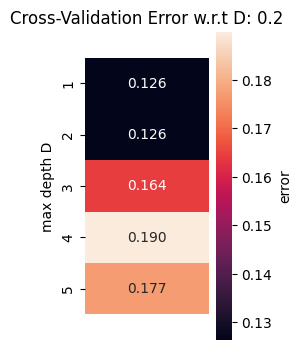

Best Max Depth: 1
Training Accuracy: 0.8734177215189873
Testing Accuracy: 0.9
Validation Accuracy: 0.8736942070275404


In [480]:
# initialize estimator, parameter grid, GridSearchCV
DST = tree.DecisionTreeClassifier(criterion='entropy', random_state = 1)
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
grid_search = GridSearchCV(estimator=DST, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Decision Tree')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(fertility_X, fertility_y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    draw_heatmap(cross_val_errors, D_list, title='Cross-Validation Error w.r.t D: {}'.format(size))
    tree_depth = grid_search.best_params_['max_depth']
    hyperparameter_lst.append(grid_search.best_params_)
    print('Best Max Depth: {}'.format(tree_depth)) 

    # new estimator with hyperparameters, train model
    DST_hp = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_depth, random_state = 1)
    DST_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = DST_hp.predict(X_train)
    Y_test_pred = DST_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))
    


#### Classifier 5: Random Forest

In [481]:
rfc = RandomForestClassifier(n_estimators=10)
criterion = ['gini', 'entropy']
max_depth = [1, 2, 3, 4, 5]
param_grid = {'criterion': criterion, 'max_depth': max_depth}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Random Forest')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(fertility_X, fertility_y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    #draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    hp = grid_search.best_params_
    hyperparameter_lst.append(hp)
    print('Hyperparameters: {}'.format(hp)) 

    # new estimator with hyperparameters, train model
    rfc_hp = RandomForestClassifier(n_estimators=10, criterion=hp['criterion'], max_depth=hp['max_depth'])
    rfc_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = rfc_hp.predict(X_train)
    Y_test_pred = rfc_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

Test: 0.8
Hyperparameters: {'criterion': 'gini', 'max_depth': 4}
Training Accuracy: 1.0
Testing Accuracy: 0.8375
Validation Accuracy: 0.7857142857142857
Test: 0.5
Hyperparameters: {'criterion': 'entropy', 'max_depth': 4}
Training Accuracy: 0.8775510204081632
Testing Accuracy: 0.94
Validation Accuracy: 0.8174019607843137
Test: 0.2
Hyperparameters: {'criterion': 'gini', 'max_depth': 4}
Training Accuracy: 0.9367088607594937
Testing Accuracy: 0.9
Validation Accuracy: 0.8865147198480532


### Performance Evaluation 1

In [482]:
fertility_eval_df = pd.DataFrame({'Model': algorithm, 
                      'Split': split, 
                      'Training Accuracy': training_accuracy_lst, 
                      'Testing Accuracy': testing_accuracy_lst, 
                      'Validation Accuracy': validation_accuracy_lst,
                      'Hyperparameters': hyperparameter_lst})
fertility_eval_df

,Model,Split,Training Accuracy,Testing Accuracy,Validation Accuracy,Hyperparameters
0,Logistic Regression,0.8/0.2,0.789474,0.8875,0.785714,"{'penalty': 'l2', 'solver': 'lbfgs'}"
1,Logistic Regression,0.5/0.5,0.836735,0.9200,0.837010,"{'penalty': 'l2', 'solver': 'liblinear'}"
2,Logistic Regression,0.2/0.8,0.873418,0.9000,0.873694,"{'penalty': 'l2', 'solver': 'lbfgs'}"
3,K-Nearest Neighbors,0.8/0.2,0.842105,0.8250,0.738095,{'n_neighbors': 4}
4,K-Nearest Neighbors,0.5/0.5,0.816327,0.9000,0.816176,{'n_neighbors': 4}
5,K-Nearest Neighbors,0.2/0.8,0.898734,0.9500,0.873694,{'n_neighbors': 2}
6,Support Vector Machine,0.8/0.2,0.684211,0.8500,0.841270,"{'C': 10, 'gamma': 10, 'kernel': 'sigmoid'}"
7,Support Vector Machine,0.5/0.5,0.816327,0.9400,0.835784,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}"
8,Support Vector Machine,0.2/0.8,0.873418,0.9000,0.873694,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}"
9,Decision Tree,0.8/0.2,0.894737,0.7250,0.730159,{'max_depth': 2}


In [548]:
# grouped by model, descending by average testing accuracy
f_model = fertility_eval_df.groupby('Model')[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
f_model

,Testing Accuracy,Training Accuracy,Validation Accuracy
Model,,,
Logistic Regression,0.902500,0.833209,0.832139
Support Vector Machine,0.896667,0.791318,0.850249
Random Forest,0.892500,0.938087,0.829877
K-Nearest Neighbors,0.891667,0.852389,0.809322
Decision Tree,0.855000,0.861494,0.806676


In [549]:
# grouped by split, descending by average testing accuracy
f_split = fertility_eval_df.groupby('Split')[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
f_split

,Testing Accuracy,Training Accuracy,Validation Accuracy
Split,,,
0.5/0.5,0.928,0.832653,0.824510
0.2/0.8,0.910,0.891139,0.876258
0.8/0.2,0.825,0.842105,0.776190


In [551]:
# grouped by model and split, descending by average testing accuracy
f_model_split = fertility_eval_df.groupby(['Model', 'Split'])[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
f_model_split

,,Testing Accuracy,Training Accuracy,Validation Accuracy
Model,Split,,,
K-Nearest Neighbors,0.2/0.8,0.9500,0.898734,0.873694
Decision Tree,0.5/0.5,0.9400,0.816327,0.816176
Random Forest,0.5/0.5,0.9400,0.877551,0.817402
Support Vector Machine,0.5/0.5,0.9400,0.816327,0.835784
Logistic Regression,0.5/0.5,0.9200,0.836735,0.837010
Decision Tree,0.2/0.8,0.9000,0.873418,0.873694
K-Nearest Neighbors,0.5/0.5,0.9000,0.816327,0.816176
Logistic Regression,0.2/0.8,0.9000,0.873418,0.873694
Random Forest,0.2/0.8,0.9000,0.936709,0.886515


Dataset 1 Rank
1. K-Nearest Neighbors
2. Decision Tree
3. Random Forest
4. Support Vector Machine
5. Logistic Regression

# Dataset 2: Breast Cancer

### Experiment 2 Setup

In [496]:
# read in breast cancer data and rename columns
breast_raw = pd.read_csv('data/breast_cancer.csv')
breast_raw.columns=['Recurrence', 'Age', 'Menopause', 'Tumor Size', 'INV Nodes', 'Node Caps', 'Degree Malignant', 'Breast', 'Breast Quadrant', 'Irradiated']

# replace binary values with 0s and 1s
breast_raw['Recurrence'] = breast_raw['Recurrence'].replace({'no-recurrence-events': 0, 'recurrence-events': 1})
breast_raw['Node Caps'] = breast_raw['Node Caps'].replace({'no': 0, 'yes': 1})
breast_raw['Irradiated'] = breast_raw['Irradiated'].replace({'no': 0, 'yes': 1})
breast_raw['Breast'] = breast_raw['Breast'].replace({'left': 0, 'right': 1})
breast_raw['Menopause'] = breast_raw['Menopause'].replace({'premeno': -1, 'ge40': 1, 'lt40': 0})
breast_raw['Degree Malignant'] = breast_raw['Degree Malignant'].astype(int)

# label encoding ordinal columns
enc = LabelEncoder()
age_arr = np.array(breast_raw['Age']).flatten()
enc.fit(age_arr)
breast_raw['Age'] = enc.transform(age_arr)

tumor_arr = np.array(breast_raw['Tumor Size']).flatten()
enc.fit(tumor_arr)
breast_raw['Tumor Size'] = enc.transform(tumor_arr)

nodes_arr = np.array(breast_raw['INV Nodes']).flatten()
enc.fit(nodes_arr)
breast_raw['INV Nodes'] = enc.transform(nodes_arr)

# one hot encoding breast quadrant
ohe = OneHotEncoder(handle_unknown='ignore')
bq_arr = np.array(breast_raw['Breast Quadrant']).flatten().reshape(-1, 1)
ohe.fit(bq_arr)
quads_ohe = ohe.transform(bq_arr).toarray()
labels = ['central', 'left_low', 'left_up', 'right_low', 'right_up']
for i, label in enumerate(labels):
    breast_raw[label] = quads_ohe[:, i]

# drop rows with null values (only 8)
breast_raw = breast_raw.replace('?', None).drop(columns=['Breast Quadrant'])
breast_cancer_df = breast_raw.dropna(how='any')

breast_cancer_df

,Recurrence,Age,Menopause,Tumor Size,INV Nodes,Node Caps,Degree Malignant,Breast,Irradiated,central,left_low,left_up,right_low,right_up
0,0,2,-1,3,0,0,2,1,0,0.0,0.0,0.0,0.0,0.0
1,0,2,-1,3,0,0,2,0,0,0.0,0.0,1.0,0.0,0.0
2,0,4,1,2,0,0,2,1,0,0.0,0.0,0.0,1.0,0.0
3,0,2,-1,0,0,0,2,1,0,0.0,0.0,0.0,0.0,1.0
4,0,4,1,2,0,0,2,0,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,1,1,-1,5,0,0,2,0,0,0.0,0.0,0.0,1.0,0.0
281,1,1,-1,3,0,0,3,0,1,0.0,0.0,0.0,1.0,0.0
282,1,4,1,3,0,0,1,1,0,0.0,0.0,0.0,1.0,0.0
283,1,2,1,5,4,0,3,0,0,0.0,0.0,1.0,0.0,0.0


In [497]:
# split x and y data
bc_X = breast_cancer_df.drop(columns=['Irradiated'])
bc_Y = breast_cancer_df['Irradiated']

In [498]:
# initialize lists to collect evaluation metric
algorithm = []
split = []
training_accuracy_lst = []
testing_accuracy_lst = []
validation_accuracy_lst = []
hyperparameter_lst  = []

### Models

#### Classifier 1: Logistic Regression

In [499]:
lr = LogisticRegression(max_iter=1000)
penalty = [None, 'l1', 'l2']
solver = ['lbfgs', 'liblinear']
param_grid = {'penalty': penalty, 'solver': solver}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Logistic Regression')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(bc_X, bc_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    #draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    hp = grid_search.best_params_
    hyperparameter_lst.append(hp)
    print('Hyperparameters: {}'.format(hp)) 

    # new estimator with hyperparameters, train model
    lr_hp = LogisticRegression(penalty=hp['penalty'], solver=hp['solver'], max_iter=1000)
    lr_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = lr_hp.predict(X_train)
    Y_test_pred = lr_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

Test: 0.8
Hyperparameters: {'penalty': 'l1', 'solver': 'liblinear'}
Training Accuracy: 0.8
Testing Accuracy: 0.7657657657657657
Validation Accuracy: 0.746588693957115
Test: 0.5
Hyperparameters: {'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy: 0.8260869565217391
Testing Accuracy: 0.7553956834532374
Validation Accuracy: 0.7753623188405797
Test: 0.2
Hyperparameters: {'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy: 0.7873303167420814
Testing Accuracy: 0.7857142857142857
Validation Accuracy: 0.7692829816117488


/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/pallavigaikwad/anaconda3

#### Classifier 2: K-Nearest Neighbors

Test: 0.8


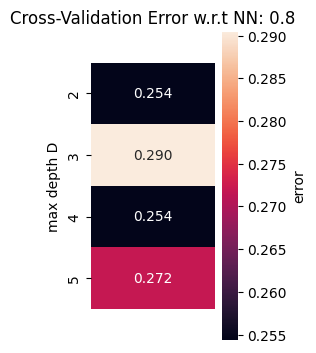

Best N_Neighbors: 2
Training Accuracy: 0.8363636363636363
Testing Accuracy: 0.7657657657657657
Validation Accuracy: 0.7456140350877193
Test: 0.5


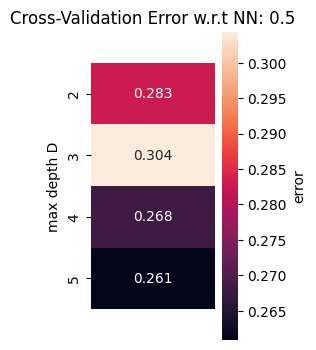

Best N_Neighbors: 5
Training Accuracy: 0.8333333333333334
Testing Accuracy: 0.7697841726618705
Validation Accuracy: 0.7391304347826088
Test: 0.2


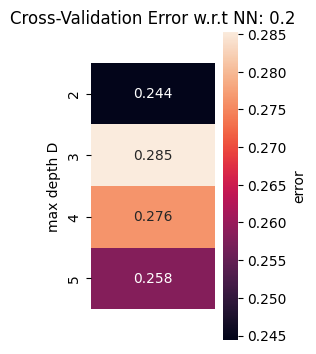

Best N_Neighbors: 2
Training Accuracy: 0.8371040723981901
Testing Accuracy: 0.7857142857142857
Validation Accuracy: 0.7555843514747624


In [500]:
knn = KNeighborsClassifier()
n_neighbors = [2, 3, 4, 5]
param_grid = {'n_neighbors': n_neighbors}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('K-Nearest Neighbors')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(bc_X, bc_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    nn = grid_search.best_params_['n_neighbors']
    hyperparameter_lst.append(grid_search.best_params_)
    print('Best N_Neighbors: {}'.format(nn)) 

    # new estimator with hyperparameters, train model
    knn_hp = KNeighborsClassifier(n_neighbors=nn)
    knn_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = knn_hp.predict(X_train)
    Y_test_pred = knn_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

#### Classifier 3: SVM

In [501]:
svm = SVC()
C = [0.001, 0.01, 0.1, 1, 10]
gamma = [0.001, 0.01, 0.1, 1, 10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {'kernel': kernel, 'C': C , 'gamma': gamma}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Support Vector Machine')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(bc_X, bc_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    #draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    hp = grid_search.best_params_
    hyperparameter_lst.append(hp)
    print('Hyperparameters: {}'.format(hp)) 

    # new estimator with hyperparameters, train model
    svm_hp = SVC(kernel=hp['kernel'], C=hp['C'], gamma=hp['gamma'])
    svm_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = svm_hp.predict(X_train)
    Y_test_pred = svm_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

Test: 0.8
Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Training Accuracy: 1.0
Testing Accuracy: 0.7657657657657657
Validation Accuracy: 0.8011695906432749
Test: 0.5
Hyperparameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Training Accuracy: 0.782608695652174
Testing Accuracy: 0.762589928057554
Validation Accuracy: 0.782608695652174
Test: 0.2
Hyperparameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Training Accuracy: 0.7647058823529411
Testing Accuracy: 0.8214285714285714
Validation Accuracy: 0.7737257805750956


#### Classifier 4: Decision Tree

Test: 0.8


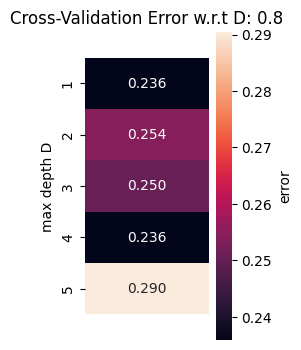

Best Max Depth: 1
Training Accuracy: 0.8
Testing Accuracy: 0.7702702702702703
Validation Accuracy: 0.7641325536062378
Test: 0.5


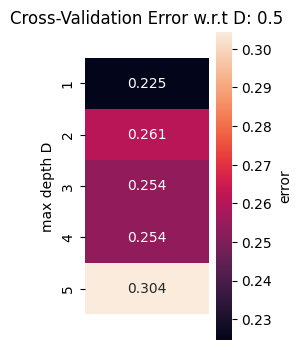

Best Max Depth: 1
Training Accuracy: 0.782608695652174
Testing Accuracy: 0.7553956834532374
Validation Accuracy: 0.7753623188405797
Test: 0.2


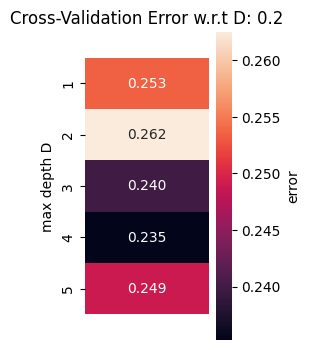

Best Max Depth: 4
Training Accuracy: 0.832579185520362
Testing Accuracy: 0.8392857142857143
Validation Accuracy: 0.7647167715660866


In [502]:
# initialize estimator, parameter grid, GridSearchCV
DST = tree.DecisionTreeClassifier(criterion='entropy', random_state = 1)
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
grid_search = GridSearchCV(estimator=DST, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Decision Tree')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(bc_X, bc_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    draw_heatmap(cross_val_errors, D_list, title='Cross-Validation Error w.r.t D: {}'.format(size))
    tree_depth = grid_search.best_params_['max_depth']
    hyperparameter_lst.append(grid_search.best_params_)
    print('Best Max Depth: {}'.format(tree_depth)) 

    # new estimator with hyperparameters, train model
    DST_hp = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_depth, random_state = 1)
    DST_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = DST_hp.predict(X_train)
    Y_test_pred = DST_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))
    

#### Classifier 5: Random Forest

In [503]:
rfc = RandomForestClassifier(n_estimators=10)
criterion = ['gini', 'entropy']
max_depth = [1, 2, 3, 4, 5]
param_grid = {'criterion': criterion, 'max_depth': max_depth}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Random Forest')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(bc_X, bc_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    #draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    hp = grid_search.best_params_
    hyperparameter_lst.append(hp)
    print('Hyperparameters: {}'.format(hp)) 

    # new estimator with hyperparameters, train model
    rfc_hp = RandomForestClassifier(n_estimators=10, criterion=hp['criterion'], max_depth=hp['max_depth'])
    rfc_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = rfc_hp.predict(X_train)
    Y_test_pred = rfc_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

Test: 0.8
Hyperparameters: {'criterion': 'gini', 'max_depth': 2}
Training Accuracy: 0.7818181818181819
Testing Accuracy: 0.7792792792792793
Validation Accuracy: 0.8011695906432749
Test: 0.5
Hyperparameters: {'criterion': 'gini', 'max_depth': 3}
Training Accuracy: 0.8333333333333334
Testing Accuracy: 0.7913669064748201
Validation Accuracy: 0.7681159420289857
Test: 0.2
Hyperparameters: {'criterion': 'gini', 'max_depth': 4}
Training Accuracy: 0.7828054298642534
Testing Accuracy: 0.8035714285714286
Validation Accuracy: 0.7693446871529064


### Performance Evaluation 2

In [504]:
breast_cancer_eval_df = pd.DataFrame({'Model': algorithm, 
                      'Split': split, 
                      'Training Accuracy': training_accuracy_lst, 
                      'Testing Accuracy': testing_accuracy_lst, 
                      'Validation Accuracy': validation_accuracy_lst,
                      'Hyperparameters': hyperparameter_lst})
breast_cancer_eval_df

,Model,Split,Training Accuracy,Testing Accuracy,Validation Accuracy,Hyperparameters
0,Logistic Regression,0.8/0.2,0.800000,0.765766,0.746589,"{'penalty': 'l1', 'solver': 'liblinear'}"
1,Logistic Regression,0.5/0.5,0.826087,0.755396,0.775362,"{'penalty': 'l2', 'solver': 'lbfgs'}"
2,Logistic Regression,0.2/0.8,0.787330,0.785714,0.769283,"{'penalty': 'l2', 'solver': 'lbfgs'}"
3,K-Nearest Neighbors,0.8/0.2,0.836364,0.765766,0.745614,{'n_neighbors': 2}
4,K-Nearest Neighbors,0.5/0.5,0.833333,0.769784,0.739130,{'n_neighbors': 5}
5,K-Nearest Neighbors,0.2/0.8,0.837104,0.785714,0.755584,{'n_neighbors': 2}
6,Support Vector Machine,0.8/0.2,1.000000,0.765766,0.801170,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}"
7,Support Vector Machine,0.5/0.5,0.782609,0.762590,0.782609,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}"
8,Support Vector Machine,0.2/0.8,0.764706,0.821429,0.773726,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}"
9,Decision Tree,0.8/0.2,0.800000,0.770270,0.764133,{'max_depth': 1}


In [545]:
# grouped by model, descending by average testing accuracy
bc_model = breast_cancer_eval_df.groupby('Model')[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
bc_model

,Testing Accuracy,Training Accuracy,Validation Accuracy
Model,,,
Random Forest,0.791406,0.799319,0.779543
Decision Tree,0.788317,0.805063,0.768071
Support Vector Machine,0.783261,0.849105,0.785835
K-Nearest Neighbors,0.773755,0.835600,0.746776
Logistic Regression,0.768959,0.804472,0.763745


In [546]:
# grouped by split, descending by average testing accuracy
bc_split = breast_cancer_eval_df.groupby('Split')[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
bc_split

,Testing Accuracy,Training Accuracy,Validation Accuracy
Split,,,
0.2/0.8,0.807143,0.800905,0.766531
0.8/0.2,0.769369,0.843636,0.771735
0.5/0.5,0.766906,0.811594,0.768116


In [547]:
# grouped by model and split, descending by average testing accuracy
bc_model_split = breast_cancer_eval_df.groupby(['Model', 'Split'])[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
bc_model_split

Testing Accuracy  Training Accuracy  \
Model                  Split                                          
Decision Tree          0.2/0.8          0.839286           0.832579   
Support Vector Machine 0.2/0.8          0.821429           0.764706   
Random Forest          0.2/0.8          0.803571           0.782805   
                       0.5/0.5          0.791367           0.833333   
K-Nearest Neighbors    0.2/0.8          0.785714           0.837104   
Logistic Regression    0.2/0.8          0.785714           0.787330   
Random Forest          0.8/0.2          0.779279           0.781818   
Decision Tree          0.8/0.2          0.770270           0.800000   
K-Nearest Neighbors    0.5/0.5          0.769784           0.833333   
                       0.8/0.2          0.765766           0.836364   
Logistic Regression    0.8/0.2          0.765766           0.800000   
Support Vector Machine 0.8/0.2          0.765766           1.000000   
                       0.5/0.5          0.762590           0.782609   
Decision Tree          0.5/0.5          0.755396           0.782609   
Logistic Regression    0.5/0.5          0.755396           0.826087   

                                Validation Accuracy  
Model                  Split                         
Decision Tree          0.2/0.8             0.764717  
Support Vector Machine 0.2/0.8             0.773726  
Random Forest          0.2/0.8             0.769345  
                       0.5/0.5             0.768116  
K-Nearest Neighbors    0.2/0.8             0.755584  
Logistic Regression    0.2/0.8             0.769283  
Random Forest          0.8/0.2             0.801170  
Decision Tree          0.8/0.2             0.764133  
K-Nearest Neighbors    0.5/0.5             0.739130  
                       0.8/0.2             0.745614  
Logistic Regression    0.8/0.2             0.746589  
Support Vector Machine 0.8/0.2             0.801170  
                       0.5/0.5             0.782609  
Decision Tree          0.5/0.5             0.775362  
Logistic Regression    0.5/0.5             0.775362

Dataset 2 Rank
1. Random Forest
2. Decision Tree
3. Support Vector Machine
4. K-Nearest Neighbors
5. Logistic Regression

# Dataset 3: Prostate Cancer

### Experiment 3 Setup

In [515]:
# read in dataset, no cleaning or feature engineering needed
prostate_raw = pd.read_csv('data/prostate_cancer.csv')
prostate_cancer_df = prostate_raw.set_index('id')
prostate_cancer_df

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,,,,,,,,,
1,M,23,12,151,954,0.143,0.278,0.242,0.079
2,B,9,13,133,1326,0.143,0.079,0.181,0.057
3,M,21,27,130,1203,0.125,0.160,0.207,0.060
4,M,14,16,78,386,0.070,0.284,0.260,0.097
5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
96,M,23,16,132,1264,0.091,0.131,0.210,0.056
97,B,22,14,78,451,0.105,0.071,0.190,0.066
98,B,19,27,62,295,0.102,0.053,0.135,0.069


In [516]:
# split x and y data
pc_X = prostate_cancer_df[prostate_cancer_df.columns[1:9]]
pc_Y = prostate_cancer_df['diagnosis_result']

In [517]:
# initialize lists to collect metric for evaluation
algorithm = []
split = []
training_accuracy_lst = []
testing_accuracy_lst = []
validation_accuracy_lst = []
hyperparameter_lst  = []

### Models

#### Classifier 1: Logistic Regression

In [518]:
lr = LogisticRegression(max_iter=1000)
penalty = [None, 'l1', 'l2']
solver = ['lbfgs', 'liblinear']
param_grid = {'penalty': penalty, 'solver': solver}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Logistic Regression')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(pc_X, pc_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    #draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    hp = grid_search.best_params_
    hyperparameter_lst.append(hp)
    print('Hyperparameters: {}'.format(hp)) 

    # new estimator with hyperparameters, train model
    lr_hp = LogisticRegression(penalty=hp['penalty'], solver=hp['solver'], max_iter=1000)
    lr_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = lr_hp.predict(X_train)
    Y_test_pred = lr_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

Test: 0.8
Hyperparameters: {'penalty': 'l2', 'solver': 'lbfgs'}
Training Accuracy: 0.75
Testing Accuracy: 0.825
Validation Accuracy: 0.5476190476190476
Test: 0.5
Hyperparameters: {'penalty': None, 'solver': 'lbfgs'}
Training Accuracy: 0.86
Testing Accuracy: 0.84
Validation Accuracy: 0.8370098039215685
Test: 0.2
Hyperparameters: {'penalty': None, 'solver': 'lbfgs'}
Training Accuracy: 0.8875
Testing Accuracy: 0.8
Validation Accuracy: 0.8494776828110161


/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


6 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/pallavigaikwad/anaconda3

#### Classifier 2: K-Nearest Neighbors

Test: 0.8


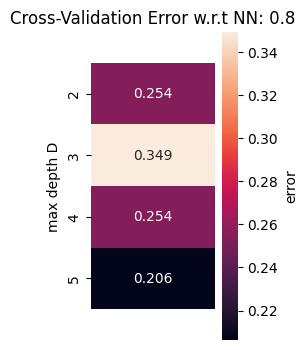

Best N_Neighbors: 5
Training Accuracy: 0.8
Testing Accuracy: 0.7625
Validation Accuracy: 0.7936507936507936
Test: 0.5


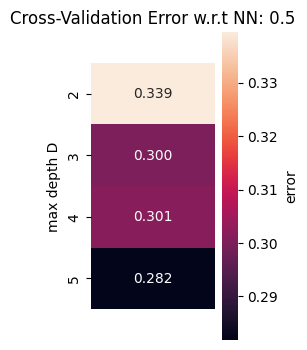

Best N_Neighbors: 5
Training Accuracy: 0.76
Testing Accuracy: 0.88
Validation Accuracy: 0.7181372549019608
Test: 0.2


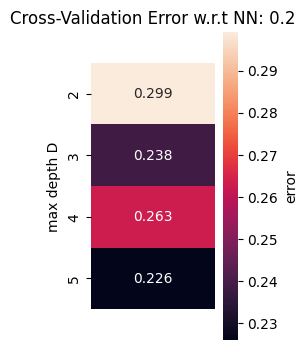

Best N_Neighbors: 5
Training Accuracy: 0.8625
Testing Accuracy: 0.8
Validation Accuracy: 0.7739791073124408


In [519]:
knn = KNeighborsClassifier()
n_neighbors = [2, 3, 4, 5]
param_grid = {'n_neighbors': n_neighbors}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('K-Nearest Neighbors')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(pc_X, pc_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    nn = grid_search.best_params_['n_neighbors']
    hyperparameter_lst.append(grid_search.best_params_)
    print('Best N_Neighbors: {}'.format(nn)) 

    # new estimator with hyperparameters, train model
    knn_hp = KNeighborsClassifier(n_neighbors=nn)
    knn_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = knn_hp.predict(X_train)
    Y_test_pred = knn_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

#### Classifier 3: SVM

In [520]:
svm = SVC()
C = [0.001, 0.01, 0.1, 1, 10]
gamma = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': C ,'gamma': gamma} 
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Support Vector Machine')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(pc_X, pc_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    #draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    hp = grid_search.best_params_
    hyperparameter_lst.append(hp)
    print('Hyperparameters: {}'.format(hp)) 

    # new estimator with hyperparameters, train model
    svm_hp = SVC(C=hp['C'], gamma=hp['gamma'])
    svm_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = svm_hp.predict(X_train)
    Y_test_pred = svm_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

Test: 0.8
Hyperparameters: {'C': 10, 'gamma': 0.001}
Training Accuracy: 1.0
Testing Accuracy: 0.6875
Validation Accuracy: 0.746031746031746
Test: 0.5
Hyperparameters: {'C': 10, 'gamma': 0.001}
Training Accuracy: 0.96
Testing Accuracy: 0.74
Validation Accuracy: 0.6605392156862745
Test: 0.2
Hyperparameters: {'C': 1, 'gamma': 0.001}
Training Accuracy: 0.875
Testing Accuracy: 0.75
Validation Accuracy: 0.7374169040835707


#### Classifier 4: Decision Tree

Test: 0.8


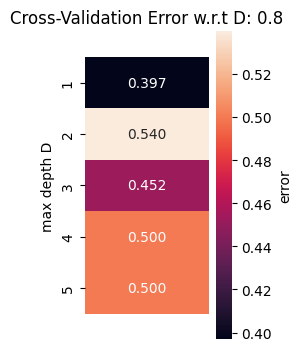

Best Max Depth: 1
Training Accuracy: 0.8
Testing Accuracy: 0.8375
Validation Accuracy: 0.6031746031746031
Test: 0.5


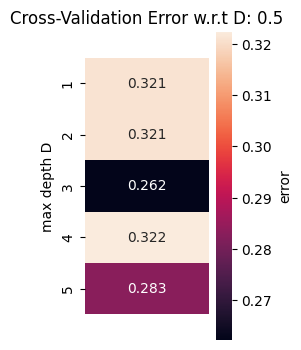

Best Max Depth: 3
Training Accuracy: 0.9
Testing Accuracy: 0.78
Validation Accuracy: 0.7377450980392157
Test: 0.2


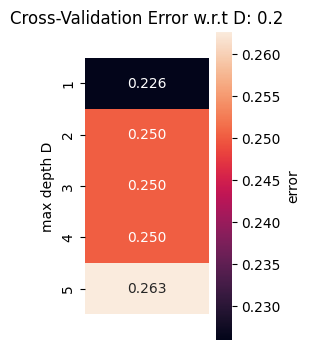

Best Max Depth: 1
Training Accuracy: 0.8625
Testing Accuracy: 0.75
Validation Accuracy: 0.7739791073124406


In [521]:
# initialize estimator, parameter grid, GridSearchCV
DST = tree.DecisionTreeClassifier(criterion='entropy', random_state = 1)
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
grid_search = GridSearchCV(estimator=DST, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Decision Tree')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(pc_X, pc_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    draw_heatmap(cross_val_errors, D_list, title='Cross-Validation Error w.r.t D: {}'.format(size))
    tree_depth = grid_search.best_params_['max_depth']
    hyperparameter_lst.append(grid_search.best_params_)
    print('Best Max Depth: {}'.format(tree_depth)) 

    # new estimator with hyperparameters, train model
    DST_hp = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_depth, random_state = 1)
    DST_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = DST_hp.predict(X_train)
    Y_test_pred = DST_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))
    

#### Classifier 5: Random Forest

In [522]:
rfc = RandomForestClassifier(n_estimators=10)
criterion = ['gini', 'entropy']
max_depth = [1, 2, 3, 4, 5]
param_grid = {'criterion': criterion, 'max_depth': max_depth}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Random Forest')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(pc_X, pc_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    #draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    hp = grid_search.best_params_
    hyperparameter_lst.append(hp)
    print('Hyperparameters: {}'.format(hp)) 

    # new estimator with hyperparameters, train model
    rfc_hp = RandomForestClassifier(n_estimators=10, criterion=hp['criterion'], max_depth=hp['max_depth'])
    rfc_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = rfc_hp.predict(X_train)
    Y_test_pred = rfc_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

Test: 0.8
Hyperparameters: {'criterion': 'entropy', 'max_depth': 2}
Training Accuracy: 0.85
Testing Accuracy: 0.8125
Validation Accuracy: 0.6984126984126985
Test: 0.5
Hyperparameters: {'criterion': 'gini', 'max_depth': 2}
Training Accuracy: 0.82
Testing Accuracy: 0.9
Validation Accuracy: 0.8370098039215685
Test: 0.2
Hyperparameters: {'criterion': 'gini', 'max_depth': 1}
Training Accuracy: 0.875
Testing Accuracy: 0.9
Validation Accuracy: 0.8371320037986706


### Performance Evaluation 3

In [523]:
prostate_cancer_eval_df = pd.DataFrame({'Model': algorithm, 
                      'Split': split, 
                      'Training Accuracy': training_accuracy_lst, 
                      'Testing Accuracy': testing_accuracy_lst, 
                      'Validation Accuracy': validation_accuracy_lst,
                      'Hyperparameters': hyperparameter_lst})
prostate_cancer_eval_df

,Model,Split,Training Accuracy,Testing Accuracy,Validation Accuracy,Hyperparameters
0,Logistic Regression,0.8/0.2,0.7500,0.8250,0.547619,"{'penalty': 'l2', 'solver': 'lbfgs'}"
1,Logistic Regression,0.5/0.5,0.8600,0.8400,0.837010,"{'penalty': None, 'solver': 'lbfgs'}"
2,Logistic Regression,0.2/0.8,0.8875,0.8000,0.849478,"{'penalty': None, 'solver': 'lbfgs'}"
3,K-Nearest Neighbors,0.8/0.2,0.8000,0.7625,0.793651,{'n_neighbors': 5}
4,K-Nearest Neighbors,0.5/0.5,0.7600,0.8800,0.718137,{'n_neighbors': 5}
5,K-Nearest Neighbors,0.2/0.8,0.8625,0.8000,0.773979,{'n_neighbors': 5}
6,Support Vector Machine,0.8/0.2,1.0000,0.6875,0.746032,"{'C': 10, 'gamma': 0.001}"
7,Support Vector Machine,0.5/0.5,0.9600,0.7400,0.660539,"{'C': 10, 'gamma': 0.001}"
8,Support Vector Machine,0.2/0.8,0.8750,0.7500,0.737417,"{'C': 1, 'gamma': 0.001}"
9,Decision Tree,0.8/0.2,0.8000,0.8375,0.603175,{'max_depth': 1}


In [541]:
# grouped by model, descending by average testing accuracy
pc_model = prostate_cancer_eval_df.groupby('Model')[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
pc_model

,Testing Accuracy,Training Accuracy,Validation Accuracy
Model,,,
Random Forest,0.870833,0.848333,0.790852
Logistic Regression,0.821667,0.832500,0.744702
K-Nearest Neighbors,0.814167,0.807500,0.761922
Decision Tree,0.789167,0.854167,0.704966
Support Vector Machine,0.725833,0.945000,0.714663


In [542]:
# grouped by split, descending by average testing accuracy
pc_split = prostate_cancer_eval_df.groupby('Split')[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
pc_split

,Testing Accuracy,Training Accuracy,Validation Accuracy
Split,,,
0.5/0.5,0.828,0.8600,0.758088
0.2/0.8,0.800,0.8725,0.794397
0.8/0.2,0.785,0.8400,0.677778


In [544]:
# grouped by model and split, descending by average testing accuracy
pc_model_split = prostate_cancer_eval_df.groupby(['Model', 'Split'])[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
pc_model_split

Testing Accuracy  Training Accuracy  \
Model                  Split                                          
Random Forest          0.2/0.8            0.9000             0.8750   
                       0.5/0.5            0.9000             0.8200   
K-Nearest Neighbors    0.5/0.5            0.8800             0.7600   
Logistic Regression    0.5/0.5            0.8400             0.8600   
Decision Tree          0.8/0.2            0.8375             0.8000   
Logistic Regression    0.8/0.2            0.8250             0.7500   
Random Forest          0.8/0.2            0.8125             0.8500   
K-Nearest Neighbors    0.2/0.8            0.8000             0.8625   
Logistic Regression    0.2/0.8            0.8000             0.8875   
Decision Tree          0.5/0.5            0.7800             0.9000   
K-Nearest Neighbors    0.8/0.2            0.7625             0.8000   
Decision Tree          0.2/0.8            0.7500             0.8625   
Support Vector Machine 0.2/0.8            0.7500             0.8750   
                       0.5/0.5            0.7400             0.9600   
                       0.8/0.2            0.6875             1.0000   

                                Validation Accuracy  
Model                  Split                         
Random Forest          0.2/0.8             0.837132  
                       0.5/0.5             0.837010  
K-Nearest Neighbors    0.5/0.5             0.718137  
Logistic Regression    0.5/0.5             0.837010  
Decision Tree          0.8/0.2             0.603175  
Logistic Regression    0.8/0.2             0.547619  
Random Forest          0.8/0.2             0.698413  
K-Nearest Neighbors    0.2/0.8             0.773979  
Logistic Regression    0.2/0.8             0.849478  
Decision Tree          0.5/0.5             0.737745  
K-Nearest Neighbors    0.8/0.2             0.793651  
Decision Tree          0.2/0.8             0.773979  
Support Vector Machine 0.2/0.8             0.737417  
                       0.5/0.5             0.660539  
                       0.8/0.2             0.746032

Dataset 3 Rank
1. Random Forest
2. Logisitc Regression
3. K-Nearest Neighbors
4. Decision Tree
5. Support Vector Machine

# Dataset 4: Maternal Health Risk

### Experiment 4 Setup

In [525]:
# read in the dataset, no cleaning or feature engineering needed
mhr_df = pd.read_csv('data/maternal_health.csv')
mhr_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [526]:
mhr_X = mhr_df[mhr_df.columns[0:6]]
mhr_Y = mhr_df['RiskLevel']

In [527]:
# initialize lists to collect metric for evaluation
algorithm = []
split = []
training_accuracy_lst = []
testing_accuracy_lst = []
validation_accuracy_lst = []
hyperparameter_lst  = []

### Models

#### Classifier 1: Logistic Regression

In [528]:
lr = LogisticRegression(max_iter=1000)
penalty = [None, 'l1', 'l2']
solver = ['lbfgs', 'liblinear']
param_grid = {'penalty': penalty, 'solver': solver}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Logistic Regression')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(mhr_X, mhr_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    #draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    hp = grid_search.best_params_
    hyperparameter_lst.append(hp)
    print('Hyperparameters: {}'.format(hp)) 

    # new estimator with hyperparameters, train model
    lr_hp = LogisticRegression(penalty=hp['penalty'], solver=hp['solver'], max_iter=1000)
    lr_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = lr_hp.predict(X_train)
    Y_test_pred = lr_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

Test: 0.8


/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Hyperparameters: {'penalty': None, 'solver': 'lbfgs'}
Training Accuracy: 0.7376237623762376
Testing Accuracy: 0.6293103448275862
Validation Accuracy: 0.692859233245537
Test: 0.5


/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Hyperparameters: {'penalty': None, 'solver': 'lbfgs'}
Training Accuracy: 0.6568047337278107
Testing Accuracy: 0.6153846153846154
Validation Accuracy: 0.6449704142011835
Test: 0.2


/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/pallavigaikwad/anaconda3/envs/hw1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Hyperparameters: {'penalty': None, 'solver': 'lbfgs'}
Training Accuracy: 0.6263871763255241
Testing Accuracy: 0.6059113300492611
Validation Accuracy: 0.6448772265500433


#### Classifier 2: K-Nearest Neighbors

Test: 0.8


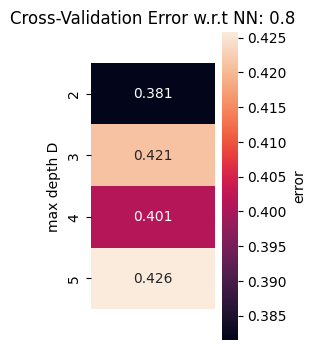

Best N_Neighbors: 2
Training Accuracy: 0.8217821782178217
Testing Accuracy: 0.5972906403940886
Validation Accuracy: 0.6185250219490781
Test: 0.5


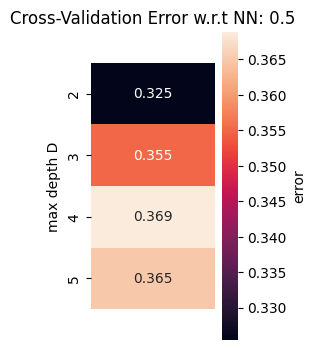

Best N_Neighbors: 2
Training Accuracy: 0.8757396449704142
Testing Accuracy: 0.7001972386587771
Validation Accuracy: 0.6745562130177515
Test: 0.2


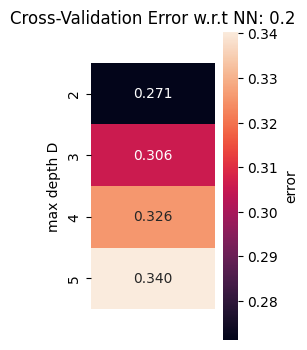

Best N_Neighbors: 2
Training Accuracy: 0.8865598027127004
Testing Accuracy: 0.7783251231527094
Validation Accuracy: 0.728732176210651


In [529]:
knn = KNeighborsClassifier()
n_neighbors = [2, 3, 4, 5]
param_grid = {'n_neighbors': n_neighbors}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('K-Nearest Neighbors')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(mhr_X, mhr_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    nn = grid_search.best_params_['n_neighbors']
    hyperparameter_lst.append(grid_search.best_params_)
    print('Best N_Neighbors: {}'.format(nn)) 

    # new estimator with hyperparameters, train model
    knn_hp = KNeighborsClassifier(n_neighbors=nn)
    knn_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = knn_hp.predict(X_train)
    Y_test_pred = knn_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

#### Classifier 3: SVM

In [530]:
svm = SVC()
C = [0.001, 0.01, 0.1, 1, 10]
gamma = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': C ,'gamma': gamma} 
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Support Vector Machine')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(mhr_X, mhr_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    #draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    hp = grid_search.best_params_
    hyperparameter_lst.append(hp)    
    print('Hyperparameters: {}'.format(hp)) 

    # new estimator with hyperparameters, train model
    svm_hp = SVC(C=hp['C'], gamma=hp['gamma'])
    svm_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = svm_hp.predict(X_train)
    Y_test_pred = svm_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)
    
    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

Test: 0.8
Hyperparameters: {'C': 10, 'gamma': 0.01}
Training Accuracy: 0.8811881188118812
Testing Accuracy: 0.6564039408866995
Validation Accuracy: 0.663081650570676
Test: 0.5
Hyperparameters: {'C': 10, 'gamma': 0.01}
Training Accuracy: 0.854043392504931
Testing Accuracy: 0.6942800788954635
Validation Accuracy: 0.7297830374753452
Test: 0.2
Hyperparameters: {'C': 10, 'gamma': 10}
Training Accuracy: 0.9223181257706535
Testing Accuracy: 0.8177339901477833
Validation Accuracy: 0.7386223862238622


#### Classifier 4: Decision Tree

Test: 0.8


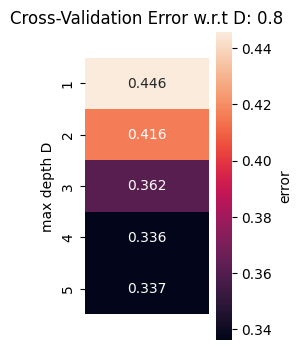

Best Max Depth: 4
Training Accuracy: 0.7524752475247525
Testing Accuracy: 0.6711822660098522
Validation Accuracy: 0.6637401229148375
Test: 0.5


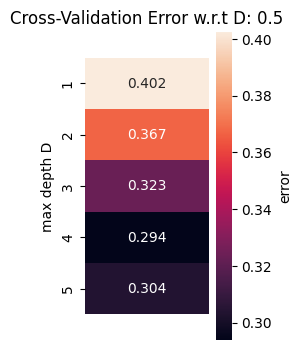

Best Max Depth: 4
Training Accuracy: 0.7218934911242604
Testing Accuracy: 0.6706114398422091
Validation Accuracy: 0.7061143984220907
Test: 0.2


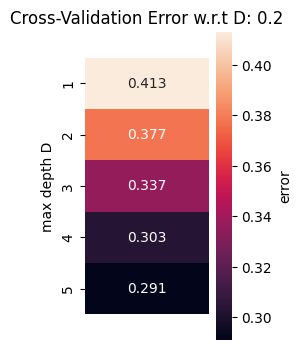

Best Max Depth: 5
Training Accuracy: 0.7336621454993835
Testing Accuracy: 0.6748768472906403
Validation Accuracy: 0.7089654229875632


In [531]:
# initialize estimator, parameter grid, GridSearchCV
DST = tree.DecisionTreeClassifier(criterion='entropy', random_state = 1)
D_list = [1, 2, 3, 4, 5]
param_grid = {'max_depth': D_list}
grid_search = GridSearchCV(estimator=DST, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Decision Tree')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(mhr_X, mhr_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    draw_heatmap(cross_val_errors, D_list, title='Cross-Validation Error w.r.t D: {}'.format(size))
    tree_depth = grid_search.best_params_['max_depth']
    hyperparameter_lst.append(grid_search.best_params_)

    print('Best Max Depth: {}'.format(tree_depth)) 

    # new estimator with hyperparameters, train model
    DST_hp = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_depth, random_state = 1)
    DST_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = DST_hp.predict(X_train)
    Y_test_pred = DST_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))
    

#### Classifier 5: Random Forest

In [532]:
rfc = RandomForestClassifier(n_estimators=10)
criterion = ['gini', 'entropy']
max_depth = [1, 2, 3, 4, 5]
param_grid = {'criterion': criterion, 'max_depth': max_depth}
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3)
test_sizes = [0.80, 0.50, 0.20]

for size in test_sizes:
    algorithm.append('Random Forest')
    split.append('{}/{}'.format(size, round(1-size, 1)))
    print('Test: {}'.format(size))
    
    # test-train split, fit GridSearchCV
    X_train, X_test, Y_train, Y_test = train_test_split(mhr_X, mhr_Y, test_size=size, random_state=1)
    grid_search.fit(X_train, Y_train)

    # find hyperparameters
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    #draw_heatmap(cross_val_errors, n_neighbors, title='Cross-Validation Error w.r.t NN: {}'.format(size))
    hp = grid_search.best_params_
    hyperparameter_lst.append(hp)
    print('Hyperparameters: {}'.format(hp)) 

    # new estimator with hyperparameters, train model
    rfc_hp = RandomForestClassifier(n_estimators=10, criterion=hp['criterion'], max_depth=hp['max_depth'])
    rfc_hp.fit(X_train, Y_train)

    # predict class labels
    Y_train_pred = rfc_hp.predict(X_train)
    Y_test_pred = rfc_hp.predict(X_test)

    # Accuracy Scores
    training_accuracy = accuracy_score(Y_train, Y_train_pred)
    training_accuracy_lst.append(training_accuracy)

    testing_accuracy = accuracy_score(Y_test, Y_test_pred)
    testing_accuracy_lst.append(testing_accuracy)

    validation_accuracy = 1 - min(cross_val_errors)[0]
    validation_accuracy_lst.append(validation_accuracy)

    print('Training Accuracy: {}'.format(training_accuracy))
    print('Testing Accuracy: {}'.format(testing_accuracy))
    print('Validation Accuracy: {}'.format(validation_accuracy))

Test: 0.8
Hyperparameters: {'criterion': 'entropy', 'max_depth': 3}
Training Accuracy: 0.7772277227722773
Testing Accuracy: 0.6514778325123153
Validation Accuracy: 0.732294410301434
Test: 0.5
Hyperparameters: {'criterion': 'gini', 'max_depth': 5}
Training Accuracy: 0.7652859960552268
Testing Accuracy: 0.6804733727810651
Validation Accuracy: 0.7218934911242604
Test: 0.2
Hyperparameters: {'criterion': 'entropy', 'max_depth': 5}
Training Accuracy: 0.7447595561035758
Testing Accuracy: 0.6748768472906403
Validation Accuracy: 0.7237847934034897


### Performance Evaluation 4

In [533]:
maternal_health_eval_df = pd.DataFrame({'Model': algorithm, 
                      'Split': split, 
                      'Training Accuracy': training_accuracy_lst, 
                      'Testing Accuracy': testing_accuracy_lst, 
                      'Validation Accuracy': validation_accuracy_lst,
                      'Hyperparameters': hyperparameter_lst})
maternal_health_eval_df

,Model,Split,Training Accuracy,Testing Accuracy,Validation Accuracy,Hyperparameters
0,Logistic Regression,0.8/0.2,0.737624,0.629310,0.692859,"{'penalty': None, 'solver': 'lbfgs'}"
1,Logistic Regression,0.5/0.5,0.656805,0.615385,0.644970,"{'penalty': None, 'solver': 'lbfgs'}"
2,Logistic Regression,0.2/0.8,0.626387,0.605911,0.644877,"{'penalty': None, 'solver': 'lbfgs'}"
3,K-Nearest Neighbors,0.8/0.2,0.821782,0.597291,0.618525,{'n_neighbors': 2}
4,K-Nearest Neighbors,0.5/0.5,0.875740,0.700197,0.674556,{'n_neighbors': 2}
5,K-Nearest Neighbors,0.2/0.8,0.886560,0.778325,0.728732,{'n_neighbors': 2}
6,Support Vector Machine,0.8/0.2,0.881188,0.656404,0.663082,"{'C': 10, 'gamma': 0.01}"
7,Support Vector Machine,0.5/0.5,0.854043,0.694280,0.729783,"{'C': 10, 'gamma': 0.01}"
8,Support Vector Machine,0.2/0.8,0.922318,0.817734,0.738622,"{'C': 10, 'gamma': 10}"
9,Decision Tree,0.8/0.2,0.752475,0.671182,0.663740,{'max_depth': 4}


In [540]:
# grouped by model, descending by average testing accuracy
mhe_model = maternal_health_eval_df.groupby('Model')[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
mhe_model

,Testing Accuracy,Training Accuracy,Validation Accuracy
Model,,,
Support Vector Machine,0.722806,0.885850,0.710496
K-Nearest Neighbors,0.691938,0.861361,0.673938
Decision Tree,0.672224,0.736010,0.692940
Random Forest,0.668943,0.762424,0.725991
Logistic Regression,0.616869,0.673605,0.660902


In [539]:
# grouped by data split, descending by average testing accuracy
mhe_split = maternal_health_eval_df.groupby('Split')[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
mhe_split

,Testing Accuracy,Training Accuracy,Validation Accuracy
Split,,,
0.2/0.8,0.710345,0.782737,0.708996
0.5/0.5,0.672189,0.774753,0.695464
0.8/0.2,0.641133,0.794059,0.674100


In [538]:
# grouped by model and split, descending by average testing accuracy
mhe_model_split = maternal_health_eval_df.groupby(['Model', 'Split'])[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
mhe_model_split

Testing Accuracy  Training Accuracy  \
Model                  Split                                          
Support Vector Machine 0.2/0.8          0.817734           0.922318   
K-Nearest Neighbors    0.2/0.8          0.778325           0.886560   
                       0.5/0.5          0.700197           0.875740   
Support Vector Machine 0.5/0.5          0.694280           0.854043   
Random Forest          0.5/0.5          0.680473           0.765286   
Decision Tree          0.2/0.8          0.674877           0.733662   
Random Forest          0.2/0.8          0.674877           0.744760   
Decision Tree          0.8/0.2          0.671182           0.752475   
                       0.5/0.5          0.670611           0.721893   
Support Vector Machine 0.8/0.2          0.656404           0.881188   
Random Forest          0.8/0.2          0.651478           0.777228   
Logistic Regression    0.8/0.2          0.629310           0.737624   
                       0.5/0.5          0.615385           0.656805   
                       0.2/0.8          0.605911           0.626387   
K-Nearest Neighbors    0.8/0.2          0.597291           0.821782   

                                Validation Accuracy  
Model                  Split                         
Support Vector Machine 0.2/0.8             0.738622  
K-Nearest Neighbors    0.2/0.8             0.728732  
                       0.5/0.5             0.674556  
Support Vector Machine 0.5/0.5             0.729783  
Random Forest          0.5/0.5             0.721893  
Decision Tree          0.2/0.8             0.708965  
Random Forest          0.2/0.8             0.723785  
Decision Tree          0.8/0.2             0.663740  
                       0.5/0.5             0.706114  
Support Vector Machine 0.8/0.2             0.663082  
Random Forest          0.8/0.2             0.732294  
Logistic Regression    0.8/0.2             0.692859  
                       0.5/0.5             0.644970  
                       0.2/0.8             0.644877  
K-Nearest Neighbors    0.8/0.2             0.618525

Dataset 4 Rank
1. Support Vector Machine
2. K-Nearest Neighbors
3. Random Forest
4. Decision Tree
5. Logistic Regression

# Evaluation Accross Datasets

In [554]:
# concatenate all evaluation datasets, grouped by model and split, descending by average testing accuracy
datasets = fertility_eval_df, breast_cancer_eval_df, prostate_cancer_eval_df, maternal_health_eval_df
evals = pd.concat(datasets, ignore_index=True)
eval_summary = evals.groupby(['Model', 'Split'])[['Testing Accuracy', 'Training Accuracy', 'Validation Accuracy']].mean().sort_values(by='Testing Accuracy', ascending=False)
eval_summary

Testing Accuracy  Training Accuracy  \
Model                  Split                                          
K-Nearest Neighbors    0.2/0.8          0.828510           0.871225   
Random Forest          0.5/0.5          0.827960           0.824043   
Support Vector Machine 0.2/0.8          0.822291           0.858860   
Random Forest          0.2/0.8          0.819612           0.834818   
K-Nearest Neighbors    0.5/0.5          0.812495           0.821350   
Decision Tree          0.2/0.8          0.791041           0.825540   
                       0.5/0.5          0.786502           0.805207   
Support Vector Machine 0.5/0.5          0.784218           0.853245   
Logistic Regression    0.5/0.5          0.782695           0.794907   
                       0.8/0.2          0.776894           0.769274   
                       0.2/0.8          0.772906           0.793659   
Random Forest          0.8/0.2          0.770189           0.852261   
Decision Tree          0.8/0.2          0.750988           0.811803   
Support Vector Machine 0.8/0.2          0.739917           0.891350   
K-Nearest Neighbors    0.8/0.2          0.737639           0.825063   

                                Validation Accuracy  
Model                  Split                         
K-Nearest Neighbors    0.2/0.8             0.782997  
Random Forest          0.5/0.5             0.786105  
Support Vector Machine 0.2/0.8             0.780865  
Random Forest          0.2/0.8             0.804194  
K-Nearest Neighbors    0.5/0.5             0.737000  
Decision Tree          0.2/0.8             0.780339  
                       0.5/0.5             0.758850  
Support Vector Machine 0.5/0.5             0.752179  
Logistic Regression    0.5/0.5             0.773588  
                       0.8/0.2             0.693195  
                       0.2/0.8             0.784333  
Random Forest          0.8/0.2             0.754398  
Decision Tree          0.8/0.2             0.690302  
Support Vector Machine 0.8/0.2             0.762888  
K-Nearest Neighbors    0.8/0.2             0.723971

Cummulative Rank
1. Random Forest
2. K-Nearest Neighbors
3. Support Vectore Machine
4. Decision Tree
5. Logistic Regression